## Desenvolvendo um classificador capaz de analisar se um comentário traz uma mensagem positiva ou negativa

link:https://www.kaggle.com/luisfredgs/imdb-ptbr?select=imdb-reviews-pt-br.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install Unidecode

In [3]:
pip install wordcloud

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk import tokenize

# importando para retirar apenas o radical das palavras
from  nltk.stem import RSLPStemmer

# remoção das pontuações
from string import punctuation

# remoção de acentos
import unidecode

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# nltk.download('all')
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
dados = pd.read_csv('/content/drive/MyDrive/NLP/analise_de_sentimento/imdb-reviews-pt-br.csv')

In [7]:
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


- Criando uma coluna numérica para representar a coluna **sentiment**

In [8]:
dados.sentiment.value_counts(normalize=True)

neg    0.500718
pos    0.499282
Name: sentiment, dtype: float64

In [9]:
# trasnformando a variável sentimento em variável numérica
dados['classificacao'] = dados['sentiment'].apply(lambda x: 1 if x=='pos' else 0)

# selecionando apenas as colunas importantes
dados.drop(columns=['id','text_en'],axis=1,inplace=True)

dados.head()

,text_pt,sentiment,classificacao
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,Filmes de fotos de latão não é uma palavra apr...,neg,0


## Pré-processamento 

Criar um a nova coluna com os dados do texto já tratados, contendo apenas palavras chaves
 
- Tokenização
- Removendo palavras irrelevantes
- Removendo pontuação e acentuação
- Extraindo radical das palavras

In [10]:
# token espaço
# token_espaco = nltk.tokenize.WhitespaceTokenizer()

# lista com palavras irrelevantes
stop_words = nltk.corpus.stopwords.words('portuguese')

# Extrair radical das palvras
stemmer = RSLPStemmer()

# Processando frases somente com palavras chaves,sem pontuação, acentos e em letra minúscula 
frase_processada = []
for opiniao in dados.text_pt:
  nova_frase = []
  token_normalizado = []
  tokens = nltk.tokenize.word_tokenize(opiniao)
  # removendo acentos das palavras
  token_normalizado = [unidecode.unidecode(palavra) for palavra in tokens]
  # removendo pontuação e normalizando as palavras
  token_normalizado = [palavra.lower() for palavra in token_normalizado]
  for palavra in token_normalizado:
     if palavra not in stop_words:
       if palavra.isalpha():
        #  extraindo o radical das palavras
         rad = stemmer.stem(palavra)
         nova_frase.append(rad)
  frase_processada.append(' '.join(nova_frase))


dados['frase_tratada'] = frase_processada

In [11]:
dados.head()

,text_pt,sentiment,classificacao,frase_tratada
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez costn arrum film temp necessari alem terri...
1,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exempl motiv maior film aca sao mesm gener cha...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,prim tud odei rap imbecil nao pod agir arm pre...
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatl pud escrev music tod gost emb walt hill ...
4,Filmes de fotos de latão não é uma palavra apr...,neg,0,film fot lata nao palavr apropri verdad sao ta...


No *script* acima, foi feito um tratamento dos dados, onde normalizei as palavras removendo acentuação e padronizei em *lowercase*.

Depois foi feito a tokenização e seleção apenas as palavras chaves usando *stopwords* já disponibilizado pela biblioteca **nltk** e removi as potuações por meio da função **isalpha**. Por último retirei apenas o radical de cada palavra.

Todo esse pré-processamento é importante para otimizar e facilitar na hora do modelo de *Machine Learning* fazer a classificação do comentário, se o mesmo  trata-se de um comentário positivo ou negativo.


### Calculando a frêquencia das palavras nos dados originais e nos dados após o tratamento

In [12]:
# unindo todas as palavras em uma unica lista
todas_palavras_col_original = ' '.join([texto for texto in dados.text_pt])

todas_palavras_col_tratada = ' '.join([texto for texto in dados.frase_tratada])


def tokenizacao(texto):
  lista_de_palavras=[]
  lista_tokens = nltk.tokenize.word_tokenize(texto)
  lista_de_tokens = [palavra.lower() for palavra in lista_tokens]
  for token in lista_de_tokens:
    if token.isalpha():
      lista_de_palavras.append(token)

  return lista_de_palavras

# calculando a frequência das palavras

palavras_orignais = tokenizacao(todas_palavras_col_original)
palavras_tratadas = tokenizacao(todas_palavras_col_tratada)


frequencia_original = nltk.FreqDist(palavras_orignais)
frequencia_tratada = nltk.FreqDist(palavras_tratadas)


df_frequencia_palavras = pd.DataFrame({'Palavra_original':frequencia_original.keys(),'Frequencia_normal':frequencia_original.values()})
df_frequencia_palavras_tratadas = pd.DataFrame({'Palavra_tratada':frequencia_tratada.keys(),'Frequencia_tratada':frequencia_tratada.values()})

- Plotando as 10 palavras que tem maior ocorrência nos comentários, antes e após o tratamento

Text(0.5, 1.0, 'Top 10 palavras depois do tratamento')

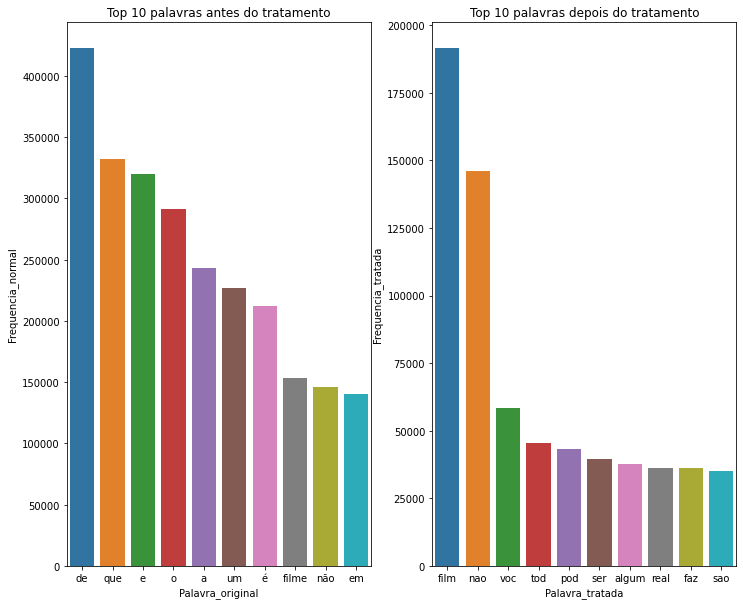

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,10))

sns.barplot(x='Palavra_original',y='Frequencia_normal',data=df_frequencia_palavras.nlargest(columns='Frequencia_normal',n=10),ax=ax[0])
ax[0].set_title('Top 10 palavras antes do tratamento')

sns.barplot(x='Palavra_tratada',y='Frequencia_tratada',data=df_frequencia_palavras_tratadas.nlargest(columns='Frequencia_tratada',n=10),ax=ax[1]);
ax[1].set_title('Top 10 palavras depois do tratamento')

Os gráficos acima trazem as 10 palavras mais frequentes dos comentários antes e após o tratamento.

Por meio da análise dos mesmos é possível observar que antes de realizar o tratamento, aparecem muitos artigos e preposições, palavras que não irão influenciar em dizer se o comentário traz uma mensagem negativa ou positiva.

Após o tratamento, esse cenário muda e podemos ver que outras palavras aparecem.

## Vetorizando um texto

- Bag of words
- Criando uma matriz representativa com as palavras
- Aplicando modelos de *Machine Learning* e avaliando sua performance

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um ótimo filme','Vi a um filme muito ruim!']


vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

# criando um dataframe com as palavras
matriz_esparsa_df = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns=vetorizar.get_feature_names())
matriz_esparsa_df

,Assisti,Vi,filme,muito,ruim,um,ótimo
0,1,0,1,0,0,1,1
1,0,1,1,1,1,1,0


In [15]:
print(bag_of_words.shape)

(2, 7)


In [16]:
#  criando uma bag of wordr com os dados do dataset
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(dados.frase_tratada)
print(bag_of_words.shape)

(49459, 50)


## Aplicando  Machine learning para classificação de textos

- Divisão em treino e teste
- Treinando um modelo

In [17]:
from sklearn.model_selection import train_test_split

# Divisão treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words,dados.classificacao, random_state=17, test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_treino,y_treino)
acuracia = lr.score(X_teste,y_teste)

print(f' A acurácia foi de {acuracia}')

 A acurácia foi de 0.6858067124949454


In [19]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()

nb_clf.fit(X_treino,y_treino)
acuracia = nb_clf.score(X_teste,y_teste)

print(acuracia)

0.6814934627308262


- Avaliando os modelos

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

Text(0.5, 24.0, 'Classe Predita')

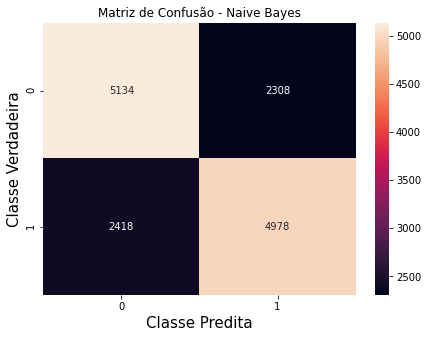

In [21]:
preds = nb_clf.predict(X_teste)

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_teste, preds), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Naive Bayes", fontsize=12)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

In [22]:
print(classification_report(y_teste,preds))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      7442
           1       0.68      0.67      0.68      7396

    accuracy                           0.68     14838
   macro avg       0.68      0.68      0.68     14838
weighted avg       0.68      0.68      0.68     14838



# Vetrorização - método TF-IDF

- Vetorizando com tfidfVectorizer
- Divisão treino e teste
- Aplicação dos modelos de *Machine Learning*
- Avaliando a performance dos modelos

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['Assisti a um filme ruim', 'assisti a um bom filme']
tfidf = TfidfVectorizer(lowercase=False)
caracteristicas =  tfidf.fit_transform(frases)

pd.DataFrame(
              caracteristicas.todense(),
             columns = tfidf.get_feature_names()
)

,Assisti,assisti,bom,filme,ruim,um
0,0.576152,0.000000,0.000000,0.409937,0.576152,0.409937
1,0.000000,0.576152,0.576152,0.409937,0.000000,0.409937


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf =  tfidf.fit_transform(dados.frase_tratada)

# Divisão treino e teste

X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf,dados.classificacao, random_state=17, test_size=0.3)


lr = LogisticRegression(solver='lbfgs')
lr.fit(X_treino,y_treino)
acuracia = lr.score(X_teste,y_teste)

print(f' A acurácia foi de {acuracia}')

 A acurácia foi de 0.890281709125219


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7442
           1       0.88      0.90      0.89      7396

    accuracy                           0.89     14838
   macro avg       0.89      0.89      0.89     14838
weighted avg       0.89      0.89      0.89     14838



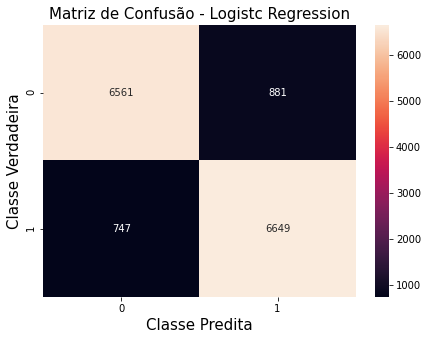

In [51]:
preds = lr.predict(X_teste)

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_teste, preds), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Logistc Regression", fontsize=15)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15);

print(classification_report(y_teste, preds))

# N-gramas

In [64]:
# exemplo de como são feitos os ngramas
from nltk import ngrams

frases='assiti a um filme ruim'
frase_separada = nltk.tokenize.word_tokenize(frases)
frases = ngrams(frase_separada,3)
list(frases)

[('assiti', 'a', 'um'), ('a', 'um', 'filme'), ('um', 'filme', 'ruim')]

In [52]:
# aplicando no dataset
tfidf_n_gramas = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

vetor_tfidf = tfidf.fit_transform(dados.frase_tratada)


X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf,dados.classificacao, random_state=17, test_size=0.3)


lr = LogisticRegression(solver='lbfgs')
lr.fit(X_treino,y_treino)
acuracia = lr.score(X_teste,y_teste)

print(f' A acurácia foi de {acuracia}')

 A acurácia foi de 0.890281709125219


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7442
           1       0.88      0.90      0.89      7396

    accuracy                           0.89     14838
   macro avg       0.89      0.89      0.89     14838
weighted avg       0.89      0.89      0.89     14838



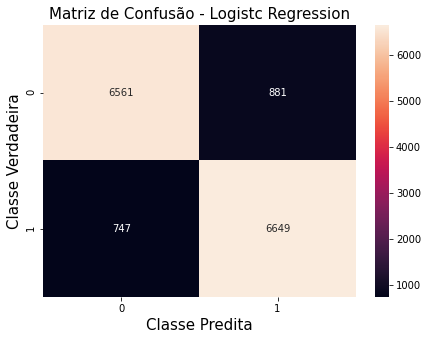

In [53]:
preds = lr.predict(X_teste)

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_teste, preds), annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Logistc Regression", fontsize=15)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15);

print(classification_report(y_teste, preds))

- Analisando os pesos das palavras 

In [54]:
pesos = pd.DataFrame(
                      lr.coef_[0].T,
                      index=tfidf.get_feature_names())

pesos.nlargest(10,0)

,0
otim,8.425882
excel,7.696924
perfeit,6.295150
favorit,5.625336
maravilh,5.397352
divert,5.056835
incri,4.485319
ador,4.307166
definitiv,4.261548
brilh,4.251428


## Gerando insights 
- Plotando uma nuvem de palavras 

In [65]:
%matplotlib inline
from wordcloud import WordCloud

In [66]:
# unindo todas as palavras em uma unica lista
todas_palavras = ' '.join([texto for texto in dados.frase_tratada])

In [69]:
# gerando a nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=500,
                          max_font_size=110,collocations=False).generate(todas_palavras)

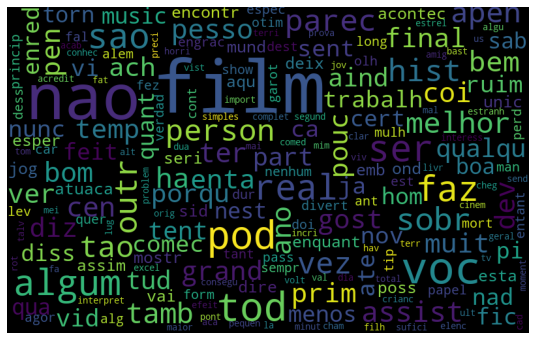

In [70]:
# plotando a nuvem de palavras


plt.figure(figsize=(12,6))
plt.imshow(nuvem_palavras)
plt.axis('off')
plt.show()

# Analisnado com **textblob**

In [ ]:
from textblob import TextBlob

In [ ]:
def sentimento(frase):
    tb = TextBlob(frase)
    tb_en = tb.translate(to='en')
    polaridade = tb_en.sentiment.polarity
    return polaridade

In [ ]:
# dados['analise_sentimentos'] = dados.text_pt.apply(sentimento)

In [ ]:
dados.text_pt[:10].apply(sentimento)

0    0.023333
1   -0.002582
2   -0.147093
3    0.070000
4    0.100450
5   -0.058869
6   -0.155417
7   -0.045635
8   -0.008333
9    0.111514
Name: text_pt, dtype: float64

In [ ]:
dados.text_pt[9]

'Fazendeiros ricos em Buenos Aires têm uma longa política de não-comércio com os Crawford de Manhattan, mas o que acontece quando o filho latino de bigode cai por um certo Crawford com olhos brilhantes, cabelos loiros e alguns movimentos alegres na pista de dança? O musical da 20th Century-Fox tem um verniz brilhante, mas parece um pouco ultrapassado nas bordas. É muito pesado na dança frenética, como ginástica, extremamente fina na história. Betty Grable, uma substituta de décima primeira hora de Alice Faye, dá um impulso, apesar de ela estar emparelhada com Don Ameche, de pele castanha e magricela. Também é bom: Charlotte Greenwood como Bettys tia, uma motorista de limusine que constantemente adormece no trabalho, e Carmen Miranda interpretando quem mais ?. As filmagens de ações da Argentina superam de longe a ação filmada no backlot da Fox, e algumas das performances de apoio são bastante terríveis. Até o final do grande final de corrida de cavalos, a maioria dos espectadores terá o